# Import previously computed statistics

In [1]:
import pandas as pd

def load_stats(host_level, attack_list):
    print("Loading Statistics from:")
    week_l_d_s_r = {}
    for attack in attack_list:
        file_params = (host_level.lower(), attack, host_level.upper())
        in_file_name = "./%s_churn_stats/%s_weekly_churn_%s.csv" % file_params
        print(in_file_name)
        week_l_d_s_r[attack] = pd.read_csv(in_file_name, index_col=[0])
    print("Finished")
    return week_l_d_s_r

attack_list = ['Labelled']
ip_l_d_s_r = load_stats("IP", attack_list)
asn_l_d_s_r = load_stats("AS", attack_list)
cc_l_d_s_r = load_stats("CC", attack_list)


Loading Statistics from:
./ip_churn_stats/Labelled_weekly_churn_IP.csv
Finished
Loading Statistics from:
./as_churn_stats/Labelled_weekly_churn_AS.csv
Finished
Loading Statistics from:
./cc_churn_stats/Labelled_weekly_churn_CC.csv
Finished


# Define cdf plotting function

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def cdf(data, m,n,s,lstring):
    data_size=len(data)

    # Set bins edges
    data_set=sorted(set(data))
    bins=np.append(data_set, data_set[-1]+1)

    # Use the histogram function to bin the data
    counts, bin_edges = np.histogram(data, bins=bins, density=False)
    counts=counts.astype(float)/data_size

    # Find the cdf
    cdf = np.cumsum(counts)
    
    # Plot the cdf
    plt.plot(bin_edges[0:-1], cdf,linestyle='%s'%n, color='%s'%m, label=lstring)    
    plt.ylim((0,1))

# Plotting code

## Lifetime Plot

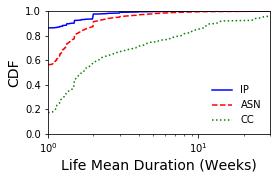

In [8]:
plt.figure(figsize=(4,2.6))

stat = 'Life'
cdf(ip_l_d_s_r['Labelled'].transpose()[stat].values,
    'b', '-', '.', "IP")
cdf(asn_l_d_s_r['Labelled'].transpose()[stat].values,
    'r', '--', '.', "ASN")
cdf(cc_l_d_s_r['Labelled'].transpose()[stat].values,
    'g', ':', '.', "CC")

plt.ylabel("CDF",fontsize=14)
plt.xlabel("Life Mean Duration (Weeks)",fontsize=14)
plt.legend(loc='lower right', frameon=False)
plt.xscale('log')
plt.xlim(1,30)

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

plt.savefig("./figures/churn_hosts_life_weekly.pdf")
plt.show()

## Deathtime Plot

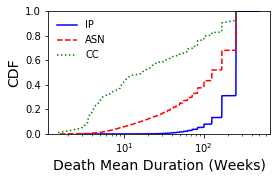

In [9]:
plt.figure(figsize=(4,2.6))

stat = 'Death'
cdf(ip_l_d_s_r['Labelled'].transpose()[stat].values,
    'b', '-', '.', "IP")
cdf(asn_l_d_s_r['Labelled'].transpose()[stat].values,
    'r', '--', '.', "ASN")
cdf(cc_l_d_s_r['Labelled'].transpose()[stat].values,
    'g', ':', '.', "CC")

plt.ylabel("CDF",fontsize=14)
plt.xlabel("Death Mean Duration (Weeks)",fontsize=14)
plt.legend(loc='upper left', frameon=False)
plt.xscale('log')

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

plt.savefig("./figures/churn_hosts_death_weekly.pdf")
plt.show()

# Rate of Arrival Plot

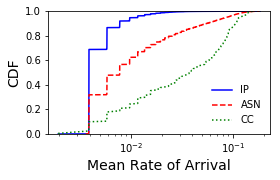

In [10]:
plt.figure(figsize=(4,2.6))

stat = 'Reciprocal Mean Duration'
cdf(ip_l_d_s_r['Labelled'].transpose()[stat].values,
    'b', '-', '.', "IP")
cdf(asn_l_d_s_r['Labelled'].transpose()[stat].values,
    'r', '--', '.', "ASN")
cdf(cc_l_d_s_r['Labelled'].transpose()[stat].values,
    'g', ':', '.', "CC")

plt.ylabel("CDF",fontsize=14)
plt.xlabel("Mean Rate of Arrival",fontsize=14)
plt.legend(loc='lower right', frameon=False)
plt.xscale('log')

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

plt.savefig("./figures/churn_hosts_roa_weekly.pdf")
plt.show()

## Severity Plot

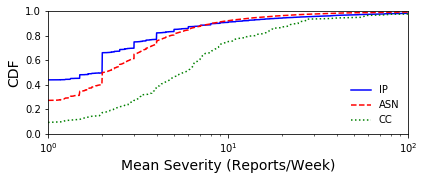

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,2.6))

stat = 'Severity'
cdf(ip_l_d_s_r['Labelled'].transpose()[stat].values,
    'b', '-', '.', "IP")
cdf(asn_l_d_s_r['Labelled'].transpose()[stat].values,
    'r', '--', '.', "ASN")
cdf(cc_l_d_s_r['Labelled'].transpose()[stat].values,
    'g', ':', '.', "CC")

plt.ylabel("CDF",fontsize=14)
plt.xlabel("Mean Severity (Reports/Week)",fontsize=14)
plt.legend(loc='lower right',frameon=False)
plt.xscale('log')
plt.xlim(0,100)

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

plt.savefig("./figures/churn_hosts_severity_weekly.pdf")
plt.show()